<h1 style='color:deeppink;font-family:Georgia;text-align:center'> Import Libraries </h1>

In [181]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from spacy.lang.en.stop_words import STOP_WORDS
from contractions import contractions_dict
from nltk.stem import WordNetLemmatizer
from itertools import filterfalse
import re
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

<h1 style='color:Blue;font-family:Georgia;text-align:center'> Read CSV File(Loading Dataset)</h1>

In [2]:
data = pd.read_csv("./datasets/emails.csv")

In [3]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
data.iloc[5723]['text']

'Subject: re : research and development charges to gpg  here it is !  - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 08 / 14 / 2000  07 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  vince j kaminski  08 / 10 / 2000 02 : 25 pm  to : vera apodaca / et & s / enron @ enron  cc : vince j kaminski / hou / ect @ ect , shirley crenshaw / hou / ect @ ect , pinnamaneni  krishnarao / hou / ect @ ect  subject : re : research and development charges to gpg  vera ,  we shall talk to the accounting group about the correction .  vince  08 / 09 / 2000 03 : 26 pm  vera apodaca @ enron  vera apodaca @ enron  vera apodaca @ enron  08 / 09 / 2000 03 : 26 pm  08 / 09 / 2000 03 : 26 pm  to : pinnamaneni krishnarao / hou / ect @ ect  cc : vince j kaminski / hou / ect @ ect  subject : research and development charges to gpg  per mail dated june 15 from kim watson , there was supposed to have occurred  a true - up of $ 274 . 7 in july for the fist six m

In [5]:
data['spam'].unique()

array([1, 0], dtype=int64)

<h3 style='color:red;font-family:Georgia;text-align:center'> Copying original dataset </h3>

In [6]:
working_dataframe = data.copy()

In [7]:
working_dataframe

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


<h3 style='color:red;font-family:Georgia;text-align:center'> Information about dataset</h3>

In [8]:
working_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


<h2 style='color:red;font-family:Georgia;text-align:center'> Missing Values </h2>

In [9]:
working_dataframe.isnull().sum().sort_values(ascending = False)

spam    0
text    0
dtype: int64

<h2 style='color:red;font-family:Georgia;text-align:Center'> Check Duplicate Records </h2>

In [10]:
print(working_dataframe.duplicated().sum()) # to check the duplicate records
working_dataframe[working_dataframe.duplicated()]

33


,text,spam
2155,Subject: research allocations to egm hi becky...,0
2260,Subject: departure of grant masson the resear...,0
2412,"Subject: re : schedule and more . . jinbaek ,...",0
2473,"Subject: day off tuesday stinson , i would l...",0
2763,"Subject: re : your mail zhendong , dr . kami...",0
3123,"Subject: re : grades pam , the students rese...",0
3152,Subject: tiger evals - attachment tiger hosts...,0
3248,"Subject: re : i am zhendong zhendong , thank...",0
3249,Subject: hello from enron dear dr . mcmullen ...,0
3387,"Subject: term paper dr . kaminski , attached...",0


In [11]:
working_dataframe.drop_duplicates(inplace=True)

In [12]:
working_dataframe

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
# for adjusting indices
working_dataframe_array = np.array(working_dataframe)

In [14]:
working_dataframe = pd.DataFrame(data = working_dataframe_array, columns=data.columns )
working_dataframe

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5690,Subject: re : research and development charges...,0
5691,"Subject: re : receipts from visit jim , than...",0
5692,Subject: re : enron case study update wow ! a...,0
5693,"Subject: re : interest david , please , call...",0


<h2 style='color:red;font-family:Georgia;text-align:center'> Spam Ratio  </h2>

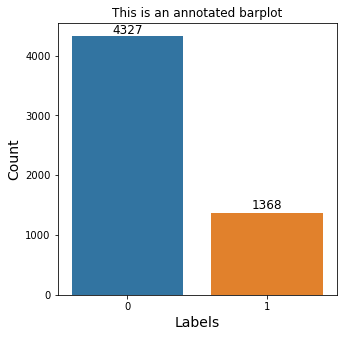

In [229]:
plt.figure(figsize=(5, 5))
plots = sns.countplot(working_dataframe['spam'])
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()*.99), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
 
    # Setting the label for x-axis
plt.xlabel("Labels", size=14)
 
# Setting the label for y-axis
plt.ylabel("Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Finally showing the plot
plt.show()

<h2 style='color:red;font-family:Georgia;text-align:center'> Remove Repeating Words </h2>

In [230]:
working_dataframe['text'][0]

'naturally irresistible corporate identity lt hard recollect company market suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website task easy promise havinq order iogo company automaticaily world ieader isguite ciear good product effective business organization practicable aim hotat nowadays market promise marketing effort effective list clear benefit creativeness hand original logo specially reflect distinctive company image convenience logo stationery provide format easy use content management system letsyou change website content structure promptness logo draft business day affordability marketing break gap budget satisfaction guarantee provide unlimited change extra fee surethat love result collaboration look portfolio interested'

In [16]:
t=working_dataframe['text'][5694]
t

'Subject: news : aurora 5 . 2 update  aurora version 5 . 2  - the fastest model just got faster -  epis announces the release of aurora , version 5 . 2  aurora the electric market price forecasting tool is already  legendary for power and speed . we \' ve combined a powerful chronological  dispatch model with the capability to simulate the market from 1  day to 25 + years . add to that a risk analysis section , powered by user  selectable monte carlo & / or latin hypercube modeling , enough  portfolio analysis power to please the toughest critic , & inputs and  outputs from standard excel & access tables and you \' ve got one of most  powerful tools in the market .  just a few months ago we expanded our emissions modeling  capabilities , added our quarterly database update , increased the speed  of the entire model , and made  but that wasn \' t enough .  we \' ve done it again . some of the operations that we \' ve  included . . .  two new reporting enhancements .  the first is margin

In [17]:
# Use re.sub. Just match all the chars upto I then replace the matched chars with I.
# re.sub(r'^.*?I', 'I', stri)

In [18]:
shortword = re.sub(r'^(Subject\s?):?\s?[\w]*\s?:\s?', '', t)
shortword

'aurora 5 . 2 update  aurora version 5 . 2  - the fastest model just got faster -  epis announces the release of aurora , version 5 . 2  aurora the electric market price forecasting tool is already  legendary for power and speed . we \' ve combined a powerful chronological  dispatch model with the capability to simulate the market from 1  day to 25 + years . add to that a risk analysis section , powered by user  selectable monte carlo & / or latin hypercube modeling , enough  portfolio analysis power to please the toughest critic , & inputs and  outputs from standard excel & access tables and you \' ve got one of most  powerful tools in the market .  just a few months ago we expanded our emissions modeling  capabilities , added our quarterly database update , increased the speed  of the entire model , and made  but that wasn \' t enough .  we \' ve done it again . some of the operations that we \' ve  included . . .  two new reporting enhancements .  the first is marginal reporting  fo

In [19]:
# def strip_titles(text):
#     if "Subject: re :" in text:
#         return text[13:]
#     elif "Subject: news :" in text:
#         return text[15:]
#     else:
#         return text[8:]

In [20]:
# custom regex removing words starting from "Subject and before 2nd colon
def strip_titles(text):
    filtered_text = re.sub(r'^(Subject\s?):?\s?[\w]*\s?:\s?', '', text)
    return filtered_text

In [21]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: strip_titles(x))

In [22]:
working_dataframe

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1
...,...,...
5690,research and development charges to gpg here ...,0
5691,"receipts from visit jim , thanks again for t...",0
5692,enron case study update wow ! all on the same...,0
5693,"interest david , please , call shirley crens...",0


<h2 style='color:red;font-family:Georgia;text-align:center'> Data Preprocessing</h2>

## Tokenization — convert sentences to words

In [23]:
working_dataframe['text'] =  working_dataframe['text'].apply(lambda x: word_tokenize(x))

In [24]:
working_dataframe

,text,spam
0,"[naturally, irresistible, your, corporate, ide...",1
1,"[the, stock, trading, gunslinger, fanny, is, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[do, not, have, money, ,, get, software, cds, ...",1
...,...,...
5690,"[research, and, development, charges, to, gpg,...",0
5691,"[receipts, from, visit, jim, ,, thanks, again,...",0
5692,"[enron, case, study, update, wow, !, all, on, ...",0
5693,"[interest, david, ,, please, ,, call, shirley,...",0


## Lower case

In [25]:
def normalize_tokens_aka_lower_case(list_of_tokens):
    return map(lambda x: x.lower(),list_of_tokens)

In [26]:
working_dataframe

,text,spam
0,"[naturally, irresistible, your, corporate, ide...",1
1,"[the, stock, trading, gunslinger, fanny, is, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[do, not, have, money, ,, get, software, cds, ...",1
...,...,...
5690,"[research, and, development, charges, to, gpg,...",0
5691,"[receipts, from, visit, jim, ,, thanks, again,...",0
5692,"[enron, case, study, update, wow, !, all, on, ...",0
5693,"[interest, david, ,, please, ,, call, shirley,...",0


In [27]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: list(x))

In [28]:
working_dataframe

,text,spam
0,"[naturally, irresistible, your, corporate, ide...",1
1,"[the, stock, trading, gunslinger, fanny, is, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[do, not, have, money, ,, get, software, cds, ...",1
...,...,...
5690,"[research, and, development, charges, to, gpg,...",0
5691,"[receipts, from, visit, jim, ,, thanks, again,...",0
5692,"[enron, case, study, update, wow, !, all, on, ...",0
5693,"[interest, david, ,, please, ,, call, shirley,...",0


## Contraction Removal like 
### don't ----- do not
### shouldn't ----- should not

In [236]:
import contractions
text = '''I'll be there within 5 min. Shouldn't you be there too?
          I'd like to have ice-cream. It's awesome to meet new friends.
          We've been waiting for this movie.'''
 
# creating an empty list
expanded_words = []   
for word in text.split():
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))  
   
expanded_text = ' '.join(expanded_words)
print('Original text: ' + text + "\n")
print('Expanded_text: ' + expanded_text)

Original text: I'll be there within 5 min. Shouldn't you be there too?
          I'd like to have ice-cream. It's awesome to meet new friends.
          We've been waiting for this movie.

Expanded_text: I will be there within 5 min. Should not you be there too? I would like to have ice-cream. It is awesome to meet new friends. We have been waiting for this movie.


In [237]:
def contracted_word_expansion(token):
    if token in contractions_dict.keys():
        return contractions_dict[token]
    else:
        return token

In [30]:
def contraction_expansion(list_of_tokens):
    return map(contracted_word_expansion,list_of_tokens)

In [31]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: contraction_expansion(x))

In [32]:
working_dataframe

,text,spam
0,<map object at 0x000002488FAD3B20>,1
1,<map object at 0x000002488FAE7520>,1
2,<map object at 0x000002488FAE7700>,1
3,<map object at 0x000002488FAE7A60>,1
4,<map object at 0x000002488FAE7C10>,1
...,...,...
5690,<map object at 0x000002489864E130>,0
5691,<map object at 0x000002489864E1C0>,0
5692,<map object at 0x000002489864E250>,0
5693,<map object at 0x000002489864E2E0>,0


In [33]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: list(x))

In [34]:
working_dataframe

,text,spam
0,"[naturally, irresistible, your, corporate, ide...",1
1,"[the, stock, trading, gunslinger, fanny, is, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[do, not, have, money, ,, get, software, cds, ...",1
...,...,...
5690,"[research, and, development, charges, to, gpg,...",0
5691,"[receipts, from, visit, jim, ,, thanks, again,...",0
5692,"[enron, case, study, update, wow, !, all, on, ...",0
5693,"[interest, david, ,, please, ,, call, shirley,...",0


## Remove Unnecsssary words

In [35]:
regex = r'^@[a-zA-z0-9]|^#[a-zA-Z0-9]|\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*|\W+|\d+|<("[^"]*"|\'[^\']*\'|[^\'">])*>|_+|[^\u0000-\u007f]+'

In [36]:
def unnecessary_words(token):
    return re.search(regex,token)

In [37]:
def filter_unnecessary_words(list_of_token):
    return filterfalse(unnecessary_words,list_of_token)

In [38]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: filter_unnecessary_words(x))

In [39]:
working_dataframe

,text,spam
0,<itertools.filterfalse object at 0x00000248985...,1
1,<itertools.filterfalse object at 0x00000248985...,1
2,<itertools.filterfalse object at 0x00000248985...,1
3,<itertools.filterfalse object at 0x00000248985...,1
4,<itertools.filterfalse object at 0x00000248985...,1
...,...,...
5690,<itertools.filterfalse object at 0x00000248986...,0
5691,<itertools.filterfalse object at 0x00000248986...,0
5692,<itertools.filterfalse object at 0x00000248986...,0
5693,<itertools.filterfalse object at 0x00000248986...,0


In [40]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: list(x))

In [41]:
working_dataframe

,text,spam
0,"[naturally, irresistible, your, corporate, ide...",1
1,"[the, stock, trading, gunslinger, fanny, is, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[color, printing, special, request, additional...",1
4,"[do, not, have, money, get, software, cds, fro...",1
...,...,...
5690,"[research, and, development, charges, to, gpg,...",0
5691,"[receipts, from, visit, jim, thanks, again, fo...",0
5692,"[enron, case, study, update, wow, all, on, the...",0
5693,"[interest, david, please, call, shirley, crens...",0


In [42]:
def split(list_of_token):
    return map(lambda x: re.split(regex,x)[0],list_of_token)

In [43]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: split(x))

In [44]:
working_dataframe

,text,spam
0,<map object at 0x000002488FAD3760>,1
1,<map object at 0x000002488FAD38B0>,1
2,<map object at 0x000002488FAD3C40>,1
3,<map object at 0x000002488FAD3DF0>,1
4,<map object at 0x000002488FAD32B0>,1
...,...,...
5690,<map object at 0x00000248987459D0>,0
5691,<map object at 0x0000024898745A60>,0
5692,<map object at 0x0000024898745AF0>,0
5693,<map object at 0x0000024898745B80>,0


In [45]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: list(x))

In [46]:
working_dataframe

,text,spam
0,"[naturally, irresistible, your, corporate, ide...",1
1,"[the, stock, trading, gunslinger, fanny, is, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[color, printing, special, request, additional...",1
4,"[do, not, have, money, get, software, cds, fro...",1
...,...,...
5690,"[research, and, development, charges, to, gpg,...",0
5691,"[receipts, from, visit, jim, thanks, again, fo...",0
5692,"[enron, case, study, update, wow, all, on, the...",0
5693,"[interest, david, please, call, shirley, crens...",0


## Removing Stopwords 
### A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)

In [47]:
en_stop_words = list(set(stopwords.words('english')).union(set(STOP_WORDS)))

In [48]:
len(en_stop_words)

382

In [49]:
def is_stopword(token):
    return not(token in en_stop_words or re.search(r'\b\w\b|[^\u0000-\u007f]+|_+|\W+',token))

In [50]:
def stopwords_removal(list_of_tokens):
    return filter(is_stopword,list_of_tokens)

In [51]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: stopwords_removal(x))

In [52]:
working_dataframe

,text,spam
0,<filter object at 0x00000248985C8250>,1
1,<filter object at 0x00000248985C8EB0>,1
2,<filter object at 0x00000248985C8A90>,1
3,<filter object at 0x00000248985C82B0>,1
4,<filter object at 0x00000248985C7730>,1
...,...,...
5690,<filter object at 0x0000024898633970>,0
5691,<filter object at 0x00000248986339D0>,0
5692,<filter object at 0x0000024898633A30>,0
5693,<filter object at 0x0000024898633A90>,0


In [53]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: list(x))

In [54]:
working_dataframe

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, easy, im, wanting, ...",1
3,"[color, printing, special, request, additional...",1
4,"[money, software, cds, software, compatibility...",1
...,...,...
5690,"[research, development, charges, gpg, forwarde...",0
5691,"[receipts, visit, jim, thanks, invitation, vis...",0
5692,"[enron, case, study, update, wow, day, super, ...",0
5693,"[interest, david, shirley, crenshaw, assistant...",0


In [55]:
working_dataframe['text'][0]

['naturally',
 'irresistible',
 'corporate',
 'identity',
 'lt',
 'hard',
 'recollect',
 'company',
 'market',
 'suqgestions',
 'information',
 'isoverwhelminq',
 'good',
 'catchy',
 'logo',
 'stylish',
 'statlonery',
 'outstanding',
 'website',
 'task',
 'easier',
 'promise',
 'havinq',
 'ordered',
 'iogo',
 'company',
 'automaticaily',
 'world',
 'ieader',
 'isguite',
 'ciear',
 'good',
 'products',
 'effective',
 'business',
 'organization',
 'practicable',
 'aim',
 'hotat',
 'nowadays',
 'market',
 'promise',
 'marketing',
 'efforts',
 'effective',
 'list',
 'clear',
 'benefits',
 'creativeness',
 'hand',
 'original',
 'logos',
 'specially',
 'reflect',
 'distinctive',
 'company',
 'image',
 'convenience',
 'logo',
 'stationery',
 'provided',
 'formats',
 'easy',
 'use',
 'content',
 'management',
 'system',
 'letsyou',
 'change',
 'website',
 'content',
 'structure',
 'promptness',
 'logo',
 'drafts',
 'business',
 'days',
 'affordability',
 'marketing',
 'break',
 'gaps',
 'budge

## Stemming
### studies --- studi, studying --- study

## Lemmatization -- Smart Stemming
### studies --- study, studying --- study

In [56]:
def get_wordnet_pos_tag(treebank_tag):
    if treebank_tag[1].startswith('J'):
        return (treebank_tag[0],wordnet.ADJ)
    elif treebank_tag[1].startswith('V'):
        return (treebank_tag[0],wordnet.VERB)
    elif treebank_tag[1].startswith('N'):
        return (treebank_tag[0],wordnet.NOUN)
    elif treebank_tag[1].startswith('R'):
        return (treebank_tag[0],wordnet.ADV)
    else:
        (treebank_tag[0],wordnet.NOUN)

In [57]:
def get_pos_tag(list_of_tokens):
    return map(get_wordnet_pos_tag,pos_tag(list_of_tokens))

In [58]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: get_pos_tag(x))

In [59]:
working_dataframe

,text,spam
0,<map object at 0x00000248987477C0>,1
1,<map object at 0x0000024898747160>,1
2,<map object at 0x00000248886D1370>,1
3,<map object at 0x00000248886D12E0>,1
4,<map object at 0x00000248886D1F70>,1
...,...,...
5690,<map object at 0x000002489B375490>,0
5691,<map object at 0x000002489B375520>,0
5692,<map object at 0x000002489B3755B0>,0
5693,<map object at 0x000002489B375640>,0


In [60]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: list(x))

In [61]:
working_dataframe

,text,spam
0,"[(naturally, r), (irresistible, a), (corporate...",1
1,"[(stock, n), (trading, n), (gunslinger, n), (f...",1
2,"[(unbelievable, a), (new, a), (homes, n), (eas...",1
3,"[(color, n), (printing, v), (special, a), (req...",1
4,"[(money, n), (software, n), (cds, n), (softwar...",1
...,...,...
5690,"[(research, n), (development, n), (charges, n)...",0
5691,"[(receipts, n), (visit, v), (jim, a), (thanks,...",0
5692,"[(enron, n), (case, n), (study, n), (update, a...",0
5693,"[(interest, n), (david, n), (shirley, n), (cre...",0


In [62]:
lemmatizer = WordNetLemmatizer()

In [63]:
def token_lemmatization(token_pos_tuple):
    if token_pos_tuple == None:
        return ""
    else:
        return lemmatizer.lemmatize(word=token_pos_tuple[0],pos=token_pos_tuple[1])

In [64]:
def lemmatization(list_of_tokens):
    if len(list_of_tokens) > 0:
        return map(lambda x: token_lemmatization(x),list_of_tokens)

In [65]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: lemmatization(x))

In [66]:
working_dataframe

,text,spam
0,<map object at 0x0000024899A66280>,1
1,<map object at 0x0000024899A66E50>,1
2,<map object at 0x0000024899A660D0>,1
3,<map object at 0x0000024899A66250>,1
4,<map object at 0x0000024899A660A0>,1
...,...,...
5690,<map object at 0x000002489FA9FE50>,0
5691,<map object at 0x000002489FA9FEE0>,0
5692,<map object at 0x000002489FA9FF70>,0
5693,<map object at 0x000002489FAA1040>,0


In [67]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: list(x))

In [68]:
working_dataframe

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, home, easy, im, want, home...",1
3,"[color, print, special, request, additional, i...",1
4,"[money, software, cd, software, compatibility,...",1
...,...,...
5690,"[research, development, charge, gpg, forward, ...",0
5691,"[receipt, visit, jim, thanks, invitation, visi...",0
5692,"[enron, case, study, update, wow, day, super, ...",0
5693,"[interest, david, shirley, crenshaw, assistant...",0


In [69]:
working_dataframe['text'][1]

['stock',
 'trading',
 'gunslinger',
 'fanny',
 'merrill',
 'muzo',
 'colza',
 'attainder',
 'penultimate',
 '',
 'esmark',
 'perspicuous',
 'ramble',
 'segovia',
 'group',
 'try',
 'sling',
 'kansa',
 'tanzania',
 'yes',
 'chameleon',
 'continuant',
 'clothesman',
 'libretto',
 'chesapeake',
 'tight',
 'waterway',
 'herald',
 'hawthorn',
 '',
 'chisel',
 'morristown',
 'superior',
 'deoxyribonucleic',
 'clockwork',
 'try',
 'hall',
 'incredible',
 'mcdougall',
 'yes',
 'hepburn',
 'einsteinian',
 'earmark',
 'sapling',
 'boar',
 'duane',
 'plain',
 'palfrey',
 'inflexible',
 '',
 'huzzah',
 'pepperoni',
 'bedtime',
 'nameable',
 'attire',
 'try',
 'edt',
 'chronography',
 'optima',
 'yes',
 'pirogue',
 'diffusion',
 'albeit']

## Feature Extraction
### making Vocabulary

In [70]:
vocab = set()

In [71]:
for list_of_tokens in working_dataframe['text']:
    vocab = vocab.union(list_of_tokens)

In [72]:
len(vocab)

29194

In [73]:
vocab_list = list(vocab)

In [74]:
vocab_list

['',
 'navigation',
 'wriggle',
 'vous',
 'egf',
 'participative',
 'prefecture',
 'sgay',
 'garvin',
 'dir',
 'warga',
 'codes',
 'herminia',
 'occ',
 'breslau',
 'darlene',
 'newsstand',
 'transotion',
 'vitality',
 'maximal',
 'clamuko',
 'woo',
 'purview',
 'illustration',
 'raider',
 'renegotiate',
 'structured',
 'liscie',
 'romance',
 'vascular',
 'lenders',
 'supernaculum',
 'impromptu',
 'chessplayer',
 'mysql',
 'cory',
 'let',
 'parity',
 'luck',
 'fiberoptic',
 'realise',
 'foresaw',
 'premia',
 'recevied',
 'parenthesis',
 'imagined',
 'uaeenquiries',
 'tejas',
 'mo',
 'tene',
 'vincek',
 'colo',
 'ferc',
 'tabele',
 'novel',
 's',
 'oilandgasremoval',
 'orb',
 'cuccia',
 'glassford',
 'annoy',
 'cfe',
 'buty',
 'aimfunds',
 'newbuscrea',
 'rynkowi',
 'gameplan',
 'diminish',
 'myrtice',
 'jozef',
 'postac',
 'tomography',
 'provision',
 'leff',
 'quesnel',
 'tense',
 'requital',
 'reinitiate',
 'underlies',
 'infact',
 'implementation',
 'galveston',
 'leveren',
 'minunte

In [75]:
vocab_list.pop(0)

''

In [76]:
len(vocab_list)

29193

In [77]:
vocab_dict = dict(zip(vocab_list,list(range(0,len(vocab_list)))))

In [78]:
vocab_dict

{'navigation': 0,
 'wriggle': 1,
 'vous': 2,
 'egf': 3,
 'participative': 4,
 'prefecture': 5,
 'sgay': 6,
 'garvin': 7,
 'dir': 8,
 'warga': 9,
 'codes': 10,
 'herminia': 11,
 'occ': 12,
 'breslau': 13,
 'darlene': 14,
 'newsstand': 15,
 'transotion': 16,
 'vitality': 17,
 'maximal': 18,
 'clamuko': 19,
 'woo': 20,
 'purview': 21,
 'illustration': 22,
 'raider': 23,
 'renegotiate': 24,
 'structured': 25,
 'liscie': 26,
 'romance': 27,
 'vascular': 28,
 'lenders': 29,
 'supernaculum': 30,
 'impromptu': 31,
 'chessplayer': 32,
 'mysql': 33,
 'cory': 34,
 'let': 35,
 'parity': 36,
 'luck': 37,
 'fiberoptic': 38,
 'realise': 39,
 'foresaw': 40,
 'premia': 41,
 'recevied': 42,
 'parenthesis': 43,
 'imagined': 44,
 'uaeenquiries': 45,
 'tejas': 46,
 'mo': 47,
 'tene': 48,
 'vincek': 49,
 'colo': 50,
 'ferc': 51,
 'tabele': 52,
 'novel': 53,
 's': 54,
 'oilandgasremoval': 55,
 'orb': 56,
 'cuccia': 57,
 'glassford': 58,
 'annoy': 59,
 'cfe': 60,
 'buty': 61,
 'aimfunds': 62,
 'newbuscrea': 6

## Making strings back in dataframe

In [79]:
def make_it_string(list_of_tokens):
    return " ".join(list_of_tokens)

In [80]:
working_dataframe['text'] = working_dataframe['text'].apply(lambda x: make_it_string(x))

In [81]:
working_dataframe

,text,spam
0,naturally irresistible corporate identity lt h...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home easy im want homeowner p...,1
3,color print special request additional informa...,1
4,money software cd software compatibility great...,1
...,...,...
5690,research development charge gpg forward shirle...,0
5691,receipt visit jim thanks invitation visit lsu ...,0
5692,enron case study update wow day super thank vi...,0
5693,interest david shirley crenshaw assistant exte...,0


In [84]:
# Spam folder has changed as object type, so changing back to integer type
working_dataframe = working_dataframe.astype({"spam": int})

In [86]:
working_dataframe['text'][0]

'naturally irresistible corporate identity lt hard recollect company market suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website task easy promise havinq order iogo company automaticaily world ieader isguite ciear good product effective business organization practicable aim hotat nowadays market promise marketing effort effective list clear benefit creativeness hand original logo specially reflect distinctive company image convenience logo stationery provide format easy use content management system letsyou change website content structure promptness logo draft business day affordability marketing break gap budget satisfaction guarantee provide unlimited change extra fee surethat love result collaboration look portfolio interested'

<h2 style='color:red;font-family:Georgia;text-align:center'> Bag of Words </h2>

### We cannot work with text directly when using machine learning algorithms. Instead, we need to convert the text to numbers. Algorithms take vectors of numbers as input, therefore we need to convert documents to fixed-length vectors of numbers.

<h2 style='color:red;font-family:Georgia;text-align:center'> CountVectorizer </h2>

### The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

In [88]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

CountVectorizer()

In [89]:
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [90]:
small_df =  pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
small_df

,brown,dog,fox,jumped,lazy,over,quick,the
0,1,1,1,1,1,1,1,2


In [91]:
dict(small_df.max())

{'brown': 1,
 'dog': 1,
 'fox': 1,
 'jumped': 1,
 'lazy': 1,
 'over': 1,
 'quick': 1,
 'the': 2}

In [92]:
sorted(dict(small_df.max()), key=dict(small_df.max()).get, reverse=True)

['the', 'brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick']

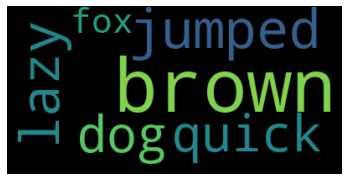

In [239]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(" ".join(sorted(dict(small_df.max()), key=dict(small_df.max()).get, reverse=True)))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
# the same vectorizer can be used on documents that contain words not included in the vocabulary. 
# These words are ignored and no count is given in the resulting vector.

text2 = ["the brown puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())
small_df =  pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
small_df

[[1 0 0 0 0 0 0 1]]


,brown,dog,fox,jumped,lazy,over,quick,the
0,1,0,0,0,0,0,0,1


In [95]:
# Creating Document Term Matrix
# cv=CountVectorizer(vocabulary = vocab_dict)
cv=CountVectorizer(max_features=7500 )

In [96]:
X = cv.fit_transform(working_dataframe['text']).toarray()

In [97]:
new_wf = pd.DataFrame(X, columns=cv.get_feature_names())
# df_dtm.index=df_grouped.index
# df_dtm.head(3)

In [98]:
new_wf

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zimin,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
new_wf['spam-label'] = working_dataframe['spam']

In [100]:
new_wf

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
new_wf['spam-label'].value_counts()

0    4327
1    1368
Name: spam-label, dtype: int64

In [132]:
min(new_wf['spam-label'].value_counts())

1368

<h2 style='color:red;font-family:Georgia;text-align:center'> Splitting Feature vectors and target vector  </h2>

In [158]:
def balance_training_testing_data_split(dataset,target_feature,training_data_size,no_of_categories):
    
    training_data_balanced = []

    remaining_data_balanced = []

    for cat in new_wf[target_feature].unique():
        print(cat)
        training_data_balanced.append(dataset[dataset[target_feature]==cat].iloc[0:training_data_size//no_of_categories])
    
        remaining_data_balanced.append(dataset[dataset[target_feature]==cat].iloc[training_data_size//no_of_categories:])
        
    training_data_balanced_df = pd.concat(training_data_balanced,axis=0)
    
    row_indices = np.arange(0,len(training_data_balanced_df)) # for shuffling the rows 
    np.random.shuffle(row_indices)
    training_data_balanced_df_shuffled = training_data_balanced_df.iloc[row_indices]
    
    cv_data_balanced_df = pd.concat(remaining_data_balanced,axis=0)
    
    row_indices = np.arange(0,len(cv_data_balanced_df)) # for shuffling the rows 
    np.random.shuffle(row_indices)
    cv_data_balanced_df_shuffled = cv_data_balanced_df.iloc[row_indices]
    
    return training_data_balanced_df_shuffled,cv_data_balanced_df_shuffled

In [193]:
new_wf[new_wf["spam-label"]==1].iloc[0:int(0.7*new_wf.shape[0])//no_of_categories]

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [159]:
target_feature = "spam-label"
no_of_categories = new_wf[target_feature].nunique()

In [165]:
training_data_balanced_shuffled,cv_data_balanced_shuffled =  balance_training_testing_data_split(new_wf,target_feature,int(1*min(new_wf['spam-label'].value_counts())),no_of_categories)

1
0


In [166]:
training_data_balanced_shuffled

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,1
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1527,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [168]:
training_data_balanced_shuffled[training_data_balanced_shuffled['spam-label']==0]

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
1795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1752,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1527,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [171]:
cv_data_balanced_shuffled[cv_data_balanced_shuffled['spam-label']==1]

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [172]:
X_train = training_data_balanced_shuffled.iloc[:,:-1]

In [173]:
y_train = training_data_balanced_shuffled.iloc[:,-1:]

In [174]:
X_test = cv_data_balanced_shuffled.iloc[:,:-1]

In [175]:
y_test = cv_data_balanced_shuffled.iloc[:,-1:]

<h2 style='color:red;font-family:Georgia;text-align:center'> Training Algorithms </h2>

In [176]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()

In [177]:
clf.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [178]:
y_pred=clf.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9671828056390108


In [182]:
metrics.confusion_matrix(y_test,y_pred)

array([[3539,  104],
       [  38,  646]], dtype=int64)

In [183]:
y_test = np.array(y_test) 
y_test = y_test.reshape(y_test.shape[0])

In [184]:
y_test.shape

(4327,)

In [185]:
confusion_matrix = pd.crosstab(y_test,y_pred, colnames= ["Predicted"], rownames = ['actual'], margins = True)
confusion_matrix

Predicted,0,1,All
actual,,,
0,3539,104,3643
1,38,646,684
All,3577,750,4327


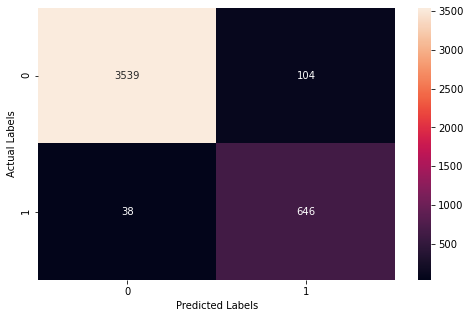

In [190]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt='d', xticklabels = np.unique(y_test), yticklabels = np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [186]:
report = metrics.classification_report(y_test,y_pred,output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
# df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
df_classification_report

,precision,recall,f1-score,support
0,0.989377,0.971452,0.980332,3643.000000
1,0.861333,0.944444,0.900976,684.000000
accuracy,0.967183,0.967183,0.967183,0.967183
macro avg,0.925355,0.957948,0.940654,4327.000000
weighted avg,0.969136,0.967183,0.967788,4327.000000


In [240]:
new_wf_not_spam = new_wf[new_wf['spam-label']==0]
new_wf_not_spam

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,0,0,0,0,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
new_wf_spam = new_wf[new_wf['spam-label']==1]
new_wf_spam

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [242]:
max_words_not_spam = dict(new_wf_not_spam.max())
max_words_not_spam

{'aa': 7,
 'aaron': 3,
 'ab': 29,
 'abacha': 0,
 'abacus': 8,
 'abandon': 1,
 'abbott': 4,
 'abhay': 8,
 'ability': 8,
 'able': 6,
 'abn': 2,
 'abovenet': 3,
 'abroad': 1,
 'absence': 2,
 'absolute': 2,
 'absolutely': 2,
 'absorb': 3,
 'abstract': 10,
 'abu': 2,
 'abuse': 1,
 'ac': 2,
 'academia': 2,
 'academic': 4,
 'acadia': 0,
 'accelerate': 3,
 'accept': 5,
 'acceptable': 7,
 'acceptance': 7,
 'accepts': 2,
 'acces': 1,
 'access': 13,
 'accessible': 2,
 'accessories': 0,
 'accessory': 0,
 'accident': 1,
 'accommodate': 2,
 'accommodation': 3,
 'accomodate': 2,
 'accompany': 1,
 'accomplish': 3,
 'accomplishment': 5,
 'accord': 5,
 'accordance': 2,
 'accordingly': 1,
 'account': 5,
 'accountability': 2,
 'accountant': 1,
 'accounting': 7,
 'accrual': 3,
 'accrue': 1,
 'accumulate': 2,
 'accumulation': 3,
 'accuracy': 3,
 'accurate': 3,
 'accurately': 2,
 'achieve': 2,
 'achievement': 1,
 'ack': 4,
 'acknowledge': 1,
 'acknowledgement': 3,
 'acl': 2,
 'acquaintance': 1,
 'acquire': 2

In [243]:
max_words_spam = dict(new_wf_spam.max())
max_words_spam

{'aa': 1,
 'aaron': 0,
 'ab': 3,
 'abacha': 4,
 'abacus': 0,
 'abandon': 1,
 'abbott': 0,
 'abhay': 0,
 'ability': 3,
 'able': 3,
 'abn': 0,
 'abovenet': 0,
 'abroad': 3,
 'absence': 2,
 'absolute': 1,
 'absolutely': 3,
 'absorb': 1,
 'abstract': 1,
 'abu': 2,
 'abuse': 1,
 'ac': 3,
 'academia': 1,
 'academic': 1,
 'acadia': 11,
 'accelerate': 1,
 'accept': 4,
 'acceptable': 1,
 'acceptance': 1,
 'accepts': 1,
 'acces': 0,
 'access': 6,
 'accessible': 1,
 'accessories': 2,
 'accessory': 3,
 'accident': 11,
 'accommodate': 0,
 'accommodation': 1,
 'accomodate': 0,
 'accompany': 0,
 'accomplish': 2,
 'accomplishment': 1,
 'accord': 3,
 'accordance': 2,
 'accordingly': 1,
 'account': 22,
 'accountability': 1,
 'accountant': 1,
 'accounting': 1,
 'accrual': 0,
 'accrue': 1,
 'accumulate': 1,
 'accumulation': 1,
 'accuracy': 2,
 'accurate': 1,
 'accurately': 2,
 'achieve': 2,
 'achievement': 1,
 'ack': 2,
 'acknowledge': 1,
 'acknowledgement': 1,
 'acl': 2,
 'acquaintance': 1,
 'acquire': 3

In [244]:
sorted_max_words_not_spam=sorted(max_words_not_spam, key=max_words_not_spam.get, reverse=True)[:100]
sorted_max_words_not_spam

['ect',
 'enron',
 'hou',
 'dpc',
 'power',
 'com',
 'mseb',
 'state',
 'board',
 'project',
 'say',
 'notice',
 'termination',
 'communication',
 'ee',
 'houston',
 'cera',
 'fax',
 'machine',
 'energy',
 'ferc',
 'file',
 'company',
 'market',
 'alt',
 'eb',
 'lender',
 'decision',
 'development',
 'url',
 'vince',
 'government',
 'edu',
 'http',
 'rice',
 'risk',
 'course',
 'www',
 'client',
 'correlation',
 'issue',
 'group',
 'html',
 'maharashtra',
 'order',
 'price',
 'year',
 'dabhol',
 'iris',
 'linux',
 'oil',
 'corp',
 'european',
 'prc',
 'committee',
 'ees',
 'fea',
 'business',
 'cap',
 'finance',
 'jcc',
 'metric',
 'storage',
 'crore',
 'hour',
 'meeting',
 'model',
 'ab',
 'bank',
 'curve',
 'derivative',
 'et',
 'godbole',
 'option',
 'kaminski',
 'pg',
 'auction',
 'december',
 'ena',
 'lon',
 'mbd',
 'new',
 'nyse',
 'class',
 'mr',
 'associate',
 'caida',
 'chapter',
 'demand',
 'exchange',
 'friday',
 'iraq',
 'official',
 'percent',
 'pjm',
 'real',
 'wharton',


In [245]:
sorted_max_words_spam=sorted(max_words_spam, key=max_words_spam.get, reverse=True)[:100]
sorted_max_words_spam

['email',
 'grant',
 'card',
 'report',
 'business',
 'broadcast',
 'program',
 'rolete',
 'mail',
 'order',
 'rlyc',
 'com',
 'service',
 'technology',
 'test',
 'genethera',
 'medium',
 'government',
 'money',
 'free',
 'halal',
 'oil',
 'send',
 'value',
 'store',
 'vspc',
 'address',
 'work',
 'company',
 'dvd',
 'conference',
 'financial',
 'gas',
 'http',
 'judgment',
 'market',
 'people',
 'quest',
 'receive',
 'trade',
 'want',
 'china',
 'enjoy',
 'vehicle',
 'viaspace',
 'animal',
 'gdvi',
 'site',
 'account',
 'disease',
 'guide',
 'modular',
 'software',
 'www',
 'game',
 'package',
 'time',
 'fuel',
 'global',
 'inc',
 'lead',
 'new',
 'property',
 'security',
 'success',
 'tab',
 'venture',
 'year',
 'gold',
 'home',
 'income',
 'industry',
 'internet',
 'online',
 'step',
 'system',
 'bonus',
 'cd',
 'challenge',
 'course',
 'start',
 'trading',
 'wealth',
 'california',
 'click',
 'complete',
 'dr',
 'heartwarmers',
 'pet',
 'relay',
 'stress',
 'adobe',
 'aid',
 'cell'

In [246]:
text_of_not_spam = " ".join(sorted_max_words_not_spam)

In [247]:
text_of_not_spam

'ect enron hou dpc power com mseb state board project say notice termination communication ee houston cera fax machine energy ferc file company market alt eb lender decision development url vince government edu http rice risk course www client correlation issue group html maharashtra order price year dabhol iris linux oil corp european prc committee ees fea business cap finance jcc metric storage crore hour meeting model ab bank curve derivative et godbole option kaminski pg auction december ena lon mbd new nyse class mr associate caida chapter demand exchange friday iraq official percent pjm real wharton california carrier director'

In [248]:
text_of_spam = " ".join(sorted_max_words_spam)
text_of_spam

'email grant card report business broadcast program rolete mail order rlyc com service technology test genethera medium government money free halal oil send value store vspc address work company dvd conference financial gas http judgment market people quest receive trade want china enjoy vehicle viaspace animal gdvi site account disease guide modular software www game package time fuel global inc lead new property security success tab venture year gold home income industry internet online step system bonus cd challenge course start trading wealth california click complete dr heartwarmers pet relay stress adobe aid cell cisse copy cow dragon learn mad'

In [ ]:
# from wordcloud import WordCloud
# wordcloud = WordCloud().generate(text_of_not_spam)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [249]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

In [250]:
# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

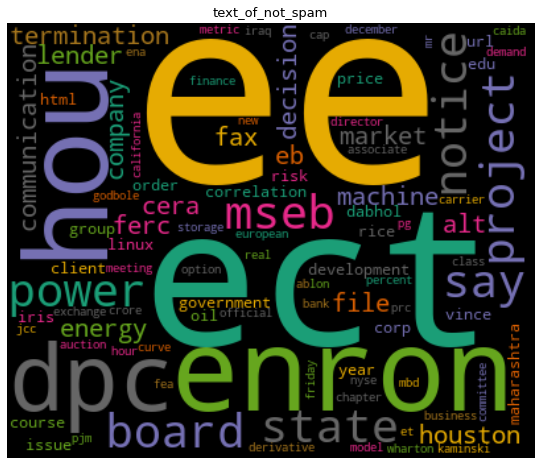

In [251]:
generate_wordcloud(text_of_not_spam,"text_of_not_spam")

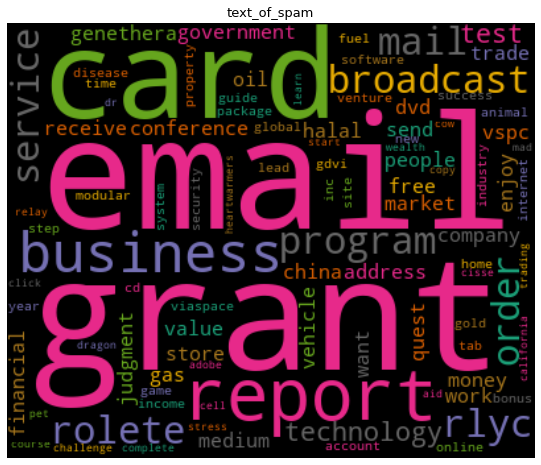

In [252]:
generate_wordcloud(text_of_spam,"text_of_spam")

<h2 style='color:red;font-family:Georgia;text-align:center'> TfidfVectorizer </h2>

## Word counts are a good starting point, but are very basic.

### One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
        "The dog.",
        "The fox",
       "The"]

In [195]:
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

TfidfVectorizer()

In [196]:
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.91629073 1.51082562 1.51082562 1.91629073 1.91629073 1.91629073
 1.91629073 1.        ]
(1, 8)
[[0.36929648 0.29115758 0.29115758 0.36929648 0.36929648 0.36929648
  0.36929648 0.38542844]]


In [197]:
idf_df =  pd.DataFrame([vectorizer.idf_], columns=vectorizer.get_feature_names())
idf_df

,brown,dog,fox,jumped,lazy,over,quick,the
0,1.916291,1.510826,1.510826,1.916291,1.916291,1.916291,1.916291,1.0


In [198]:
small_df =  pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
small_df

,brown,dog,fox,jumped,lazy,over,quick,the
0,0.369296,0.291158,0.291158,0.369296,0.369296,0.369296,0.369296,0.385428


# Make Corpus

In [199]:
corpus = list()
for email_text in working_dataframe['text']:
    corpus.append(email_text)

In [200]:
corpus

['naturally irresistible corporate identity lt hard recollect company market suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website task easy promise havinq order iogo company automaticaily world ieader isguite ciear good product effective business organization practicable aim hotat nowadays market promise marketing effort effective list clear benefit creativeness hand original logo specially reflect distinctive company image convenience logo stationery provide format easy use content management system letsyou change website content structure promptness logo draft business day affordability marketing break gap budget satisfaction guarantee provide unlimited change extra fee surethat love result collaboration look portfolio interested',
 'stock trading gunslinger fanny merrill muzo colza attainder penultimate  esmark perspicuous ramble segovia group try sling kansa tanzania yes chameleon continuant clothesman libretto chesapeake tight waterway her

In [201]:
vectorizer = TfidfVectorizer(max_features=7500)
tf_idf_matrix = vectorizer.fit_transform(corpus)

In [202]:
tf_idf_matrix.shape

(5695, 7500)

In [203]:
vectorizer.get_feature_names()

['aa',
 'aaron',
 'ab',
 'abacha',
 'abacus',
 'abandon',
 'abbott',
 'abhay',
 'ability',
 'able',
 'abn',
 'abovenet',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'absorb',
 'abstract',
 'abu',
 'abuse',
 'ac',
 'academia',
 'academic',
 'acadia',
 'accelerate',
 'accept',
 'acceptable',
 'acceptance',
 'accepts',
 'acces',
 'access',
 'accessible',
 'accessories',
 'accessory',
 'accident',
 'accommodate',
 'accommodation',
 'accomodate',
 'accompany',
 'accomplish',
 'accomplishment',
 'accord',
 'accordance',
 'accordingly',
 'account',
 'accountability',
 'accountant',
 'accounting',
 'accrual',
 'accrue',
 'accumulate',
 'accumulation',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achievement',
 'ack',
 'acknowledge',
 'acknowledgement',
 'acl',
 'acquaintance',
 'acquire',
 'acquisition',
 'acre',
 'acrobat',
 'act',
 'action',
 'activate',
 'active',
 'actively',
 'activity',
 'actual',
 'actually',
 'actuarial',
 'acy',
 'ad',
 'adam',
 'adams',
 'adapt',
 '

In [204]:
new_wf_tf_idf = pd.DataFrame(data = tf_idf_matrix.toarray(), columns=vectorizer.get_feature_names())

In [205]:
new_wf_tf_idf['spam-label'] = working_dataframe['spam']

In [206]:
new_wf_tf_idf

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.051081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [207]:
target_feature = "spam-label"
no_of_categories = new_wf_tf_idf[target_feature].nunique()

In [208]:
# training_data_balanced_shuffled,cv_data_balanced_shuffled =  balance_training_testing_data_split(new_wf_tf_idf,target_feature,int(0.8*new_wf_tf_idf.shape[0]),no_of_categories)
training_data_balanced_shuffled,cv_data_balanced_shuffled =  balance_training_testing_data_split(new_wf_tf_idf,target_feature,int(1*min(new_wf_tf_idf['spam-label'].value_counts())),no_of_categories)

1
0


In [209]:
training_data_balanced_shuffled

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
1517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [210]:
cv_data_balanced_shuffled

,aa,aaron,ab,abacha,abacus,abandon,abbott,abhay,ability,able,...,zingales,zip,ziplip,zipter,zlu,zone,zum,zuma,zzzz,spam-label
873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018101,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [211]:
X_train = training_data_balanced_shuffled.iloc[:,:-1]

In [212]:
y_train = training_data_balanced_shuffled.iloc[:,-1:]

In [213]:
X_test = cv_data_balanced_shuffled.iloc[:,:-1]

In [214]:
y_test = cv_data_balanced_shuffled.iloc[:,-1:]

In [215]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()

In [216]:
clf.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [217]:
y_pred=clf.predict(X_test)

In [218]:
np.unique(y_pred)

array([0, 1])

In [219]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9542408134966489


In [220]:
metrics.confusion_matrix(y_test,y_pred)

array([[3489,  154],
       [  44,  640]], dtype=int64)

In [221]:
report = metrics.classification_report(y_test,y_pred,output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
# df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
df_classification_report

,precision,recall,f1-score,support
0,0.987546,0.957727,0.972408,3643.000000
1,0.806045,0.935673,0.866035,684.000000
accuracy,0.954241,0.954241,0.954241,0.954241
macro avg,0.896796,0.946700,0.919222,4327.000000
weighted avg,0.958855,0.954241,0.955593,4327.000000


In [223]:
y_test = np.array(y_test) 
y_test = y_test.reshape(y_test.shape[0])

In [224]:
y_test.shape

(4327,)

In [225]:
confusion_matrix = pd.crosstab(y_test,y_pred, colnames= ["Predicted"], rownames = ['actual'], margins = True)
confusion_matrix

Predicted,0,1,All
actual,,,
0,3489,154,3643
1,44,640,684
All,3533,794,4327


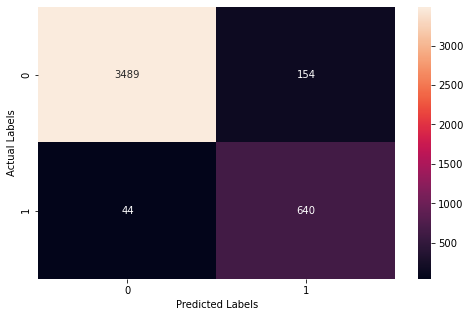

In [226]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt='d', xticklabels = np.unique(y_test), yticklabels = np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()